In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
pwd

'C:\\Users\\HP\\anaconda3'

## Read File1.txt

In [4]:
file=pd.read_csv(r'Irish_DataSet\File1.txt',header=None,delimiter=" ")
file.rename(columns={0: "ID", 1: "Timestamp", 2: "Consumption"},inplace=True)
def is_valid_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False
file.head()

,ID,Timestamp,Consumption
0,1392,19503,0.140
1,1392,19504,0.138
2,1392,19505,0.140
3,1392,19506,0.145
4,1392,19507,0.145


In [5]:
file["Day"]= file["Timestamp"].apply(lambda x: str(x)[:3] if is_valid_integer(str(x)) else None)
file["Time"]=file["Timestamp"].apply(lambda x: str(x)[3:] if is_valid_integer(str(x)) else None)

In [6]:
file['Timestamp'] = pd.to_numeric(file['Timestamp'], errors='coerce', downcast='integer')
file['Day'] = pd.to_numeric(file['Day'], errors='coerce', downcast='integer')
file['Time'] = pd.to_numeric(file['Time'], errors='coerce', downcast='integer')

In [7]:
timestamp_to_delete = 'Timestamp'
if timestamp_to_delete in file.columns:
    file.drop(columns=[timestamp_to_delete], inplace=True)
file.head()

,ID,Consumption,Day,Time
0,1392,0.140,195,3
1,1392,0.138,195,4
2,1392,0.140,195,5
3,1392,0.145,195,6
4,1392,0.145,195,7


In [8]:
def convert_day_to_date(day):
    base_date = datetime(2009, 1, 1)
    converted_date = base_date + timedelta(days=day - 195) 
    return converted_date

In [9]:
file['Date'] = file['Day'].apply(convert_day_to_date)

In [10]:
file['DayOfWeek'] = file['Date'].dt.strftime('%A')

## SME and Residential allocations

In [11]:
res_allocation=pd.read_excel('Irish_DataSet\\SME and Residential allocations.xlsx')
res_allocation.dtypes
res_allocation.head()

,ID,Code,Residential - Tariff allocation,Residential - stimulus allocation,SME allocation
0,1000,3,NaN,NaN,NaN
1,1001,3,NaN,NaN,NaN
2,1002,1,E,E,NaN
3,1003,1,A,4,NaN
4,1004,1,A,2,NaN


## Remove SME allocation

In [21]:
column_name_to_delete = 'SME allocation'
if column_name_to_delete in res_allocation.columns:
    res_allocation.drop(columns=[column_name_to_delete], inplace=True)
res_allocation

,ID,Code,Residential - Tariff allocation,Residential - stimulus allocation
0,1000,3,NaN,NaN
1,1001,3,NaN,NaN
2,1002,1,E,E
3,1003,1,A,4
4,1004,1,A,2
...,...,...,...,...
6440,7440,1,A,3
6441,7441,1,E,E
6442,7442,1,D,3
6443,7443,1,A,4


In [72]:
filtered_res_allocation = res_allocation[res_allocation['Code'] == 3]
filtered_res_allocation.head()

,ID,Code,Residential - Tariff allocation,Residential - stimulus allocation
0,1000,3,NaN,NaN
1,1001,3,NaN,NaN
7,1007,3,NaN,NaN
10,1010,3,NaN,NaN
11,1011,3,NaN,NaN


In [73]:
char_to_int = {'NaN': -1, 'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'W': 5}

# Use one-hot encoding for 'Residential - stimulus allocation'
# df_encoded = pd.get_dummies(filtered_res_allocation, columns=['Residential - stimulus allocation'], prefix='Residential - stimulus')
# df_encoded

# filtered_res_allocation['Residential - stimulus allocation'].fillna(0, inplace=True)

# filtered_res_allocation.loc[:,'Residential - Tariff allocation'] = filtered_res_allocation['Residential - Tariff allocation'].fillna(6,inplace =True).astype(int)

# filtered_res_allocation.loc[:,'Residential - stimulus allocation'] = filtered_res_allocation['Residential - stimulus allocation'].map(char_to_int).fillna(6).astype(int)
# filtered_res_allocation['Residential - Tariff allocation'] = pd.to_numeric(filtered_res_allocation['Residential - Tariff allocation'], errors='coerce', downcast='integer')
# filtered_res_allocation.loc['Residential - stimulus allocation'] = pd.to_numeric(filtered_res_allocation['Residential - stimulus allocation'], errors='coerce', downcast='integer')

# filtered_res_allocation.loc[:,'Residential - Tariff allocation'] = filtered_res_allocation['Residential - Tariff allocation'].map(char_to_int)
# filtered_res_allocation.loc[:,'Residential - stimulus allocation'] = filtered_res_allocation['Residential - stimulus allocation'].map(char_to_int)

In [15]:
res_file=pd.merge(file, filtered_res_allocation, on='ID', how='inner')
res_file.shape
res_file.head()

,ID,Consumption,Day,Time,Date,DayOfWeek,Code,Residential - Tariff allocation,Residential - stimulus allocation
0,1392,0.140,195,3,2009-01-01,Thursday,3.0,NaN,NaN
1,1392,0.138,195,4,2009-01-01,Thursday,3.0,NaN,NaN
2,1392,0.140,195,5,2009-01-01,Thursday,3.0,NaN,NaN
3,1392,0.145,195,6,2009-01-01,Thursday,3.0,NaN,NaN
4,1392,0.145,195,7,2009-01-01,Thursday,3.0,NaN,NaN


In [16]:
res_pre_trial=pd.read_excel('Irish_DataSet\\Smart meters Residential pre-trial survey data.xlsx')
res_pre_trial.head()

,ID,Question 200: PLEASE RECORD SEX FROM VOICE,"Question 300: May I ask what age you were on your last birthday? INT: IF NECCESSARY, PROMPT WITH AGE BANDS","Question 310: What is the employment status of the chief income earner in your household, is he/she","Question 401: SOCIAL CLASS Interviewer, Respondent said that occupation of chief income earner was.... <CLASS> Please code",Question 405: Do you have internet access in your home?,Question 406: Do you have broadband in your home?,Question 407: Do you use the internet regularly yourself?,Question 408: Are there other people in your household that use the internet regularly?,Question 410: What best describes the people you live with? READ OUT,...,"Question 402: And considering income, what is the approximate income of your household - this should be before tax, you should include the income of all adults in the household? Please note that this figure will remain completely confidential and will not",Question 4021: Can you state which of the following broad categories best represents the yearly household income BEFORE TAX?,Question 403: Is that figure,Question 404: Can I just double check is that figure..,Question 55113: The number of suppliers competing in the market,Question 55114: The percentage of electricity being generated from renewable sources,Question 55115: The overall cost of electricity,Question 55116: The number of estimated bills received by customers,Question 55117: The opportunity to sell back extra electricity you may generate (from solar panels etc) to your electricity supplier,Question 55118: The environmental damage associated with the amount of electricity used
0,1002,1,6,6,4,2,,2,2,1,...,NaN,1,,,2,3,2,2,1,5
1,1003,1,2,1,2,1,1,1,1,3,...,3.0,,3,1,1,3,3,3,5,5
2,1004,1,4,1,2,1,1,1,1,2,...,6.0,,3,1,3,2,3,2,3,1
3,1005,2,3,1,2,1,1,1,1,2,...,NaN,6,,,5,3,4,2,2,5
4,1008,2,3,1,2,1,2,4,1,3,...,NaN,6,,,3,3,4,4,2,2


In [17]:
res_post_trial=pd.read_excel('Irish_DataSet\\Smart meters Residential post-trial survey data.xlsx')
res_post_trial.head()

,ID,Question 9002: GROUPS,Question 9003: GROUPS: OLR,Question 9003: GROUPS: IHD,Question 9003: GROUPS: USAGE STATEMENT MONTHLY,Question 9003: GROUPS: USAGE STATEMENT EVERY TWO MONTHS,Question 9003: GROUPS: NONE,Question 100001: GROUP,Question 100004: TARIFF,Question 100005: STIMULUS,...,Question 66202: The target set was reasonable,Question 66202: The target encouraged me [us] to reduce the amount of electricity overall,Question 66202: I understood what I needed to do to achieve the target,Question 66202: I [we] tried to meet the target,Question 66202: The 20 Euro incentive for meeting the target was reasonable given the effort required,Question 66202: It would have been easier to meet the target if I had additional information,Question 66212: A device for your home which shows how much electricity you are using and how much it costs at different times of day,Question 66212: A device for your home which allows you to look at your usage and the cost over the last week or longer periods,Question 66212: A web-site which you can login to view your usage and the cost over the last week or longer periods,Question 66212: A web-site which you can login to view your usage and the cost over the last week or longer periods and includes information on how much appliances cost to use and other advice on reducing usage
0,1002,1,0,0,0,0,1,1,3,1,...,,,,,,,,,,
1,1003,2,1,0,0,1,1,1,1,2,...,4,4,3,4,4,5,4,5,5,5
2,1004,2,0,0,1,0,1,1,2,1,...,,,,,,,,,,
3,1008,2,0,0,0,1,1,0,,,...,,,,,,,,,,
4,1014,1,0,0,0,0,1,1,4,2,...,,,,,,,,,,


In [47]:
merged_res_file_pre_trial=pd.merge(res_file, res_pre_trial, on='ID', how='inner')
merged_res_file_pre_trial

,ID,Consumption,Day,Time,Date,DayOfWeek,Code,Residential - Tariff allocation,Residential - stimulus allocation,Question 200: PLEASE RECORD SEX FROM VOICE,...,"Question 402: And considering income, what is the approximate income of your household - this should be before tax, you should include the income of all adults in the household? Please note that this figure will remain completely confidential and will not",Question 4021: Can you state which of the following broad categories best represents the yearly household income BEFORE TAX?,Question 403: Is that figure,Question 404: Can I just double check is that figure..,Question 55113: The number of suppliers competing in the market,Question 55114: The percentage of electricity being generated from renewable sources,Question 55115: The overall cost of electricity,Question 55116: The number of estimated bills received by customers,Question 55117: The opportunity to sell back extra electricity you may generate (from solar panels etc) to your electricity supplier,Question 55118: The environmental damage associated with the amount of electricity used
0,1194,0.399,195,1,2009-01-01,Thursday,3.0,NaN,NaN,1,...,5.0,,3,1,5,5,5,3,3,1
1,1194,0.305,195,2,2009-01-01,Thursday,3.0,NaN,NaN,1,...,5.0,,3,1,5,5,5,3,3,1
2,1194,0.280,195,3,2009-01-01,Thursday,3.0,NaN,NaN,1,...,5.0,,3,1,5,5,5,3,3,1
3,1194,0.245,195,4,2009-01-01,Thursday,3.0,NaN,NaN,1,...,5.0,,3,1,5,5,5,3,3,1
4,1194,0.389,195,5,2009-01-01,Thursday,3.0,NaN,NaN,1,...,5.0,,3,1,5,5,5,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538467,1409,1.266,730,44,2010-06-20,Sunday,3.0,NaN,NaN,2,...,NaN,6,,,3,3,4,2,3,3
2538468,1409,1.229,730,45,2010-06-20,Sunday,3.0,NaN,NaN,2,...,NaN,6,,,3,3,4,2,3,3
2538469,1409,1.141,730,46,2010-06-20,Sunday,3.0,NaN,NaN,2,...,NaN,6,,,3,3,4,2,3,3
2538470,1409,0.626,730,47,2010-06-20,Sunday,3.0,NaN,NaN,2,...,NaN,6,,,3,3,4,2,3,3


In [19]:
meter_days = merged_res_file_pre_trial.groupby('ID')['Day'].unique().to_dict()
min_day = merged_res_file_pre_trial['Day'].min()
max_day = merged_res_file_pre_trial['Day'].max()

missing_days = {}

for meter_id, days in meter_days.items():
    all_days = set(range(min_day, max_day + 1))
    missing = all_days - set(days)
    missing_days[meter_id] = sorted(list(missing))

for meter_id, missing_day_list in missing_days.items():
    print(f"Meter {meter_id} has {len(missing_day_list)} missing days:")
    print(missing_day_list)
    print()
# for meterId, days in meter_days.items():
#     si = len(days)
#     days_set = sorted(list(days))
#     start = days_set[0]
#     end = days_set[-1]
#     dif = end - start + 1
    
#     if dif != si:
#         print(f"MeterId: {meterId}")
#         print(f"Total days: {si}, Range: {start} - {end}")
#         expected_day = start
        
#         for day in days_set:
#             if day != expected_day:
#                 print(f"Missing days between {expected_day} and {day - 1}")
#             expected_day = day + 1

Meter 1017 has 2 missing days:
[703, 704]

Meter 1029 has 1 missing days:
[722]

Meter 1031 has 0 missing days:
[]

Meter 1032 has 0 missing days:
[]

Meter 1043 has 45 missing days:
[686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730]

Meter 1046 has 1 missing days:
[722]

Meter 1048 has 396 missing days:
[335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438

In [20]:
zero_consumption_count = (merged_res_file_pre_trial['Consumption'] == 0).sum()
print(f"Number of zero consumption values: {zero_consumption_count}")

Number of zero consumption values: 28501


In [42]:
positive_consumption_count = (merged_res_file_pre_trial['Consumption'] > 0).sum()
print(f"Number of positive consumption values: {positive_consumption_count}")

Number of positive consumption values: 2509971


In [45]:
negative_consumption_count = (merged_res_file_pre_trial['Consumption'] < 0).sum()
print(f"Number of negative consumption values: {negative_consumption_count}")

Number of negative consumption values: 0


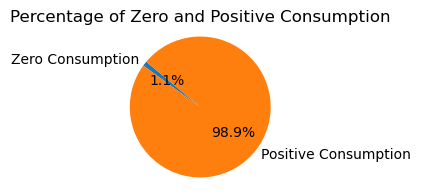

In [57]:
counts = [zero_consumption_count, positive_consumption_count]
labels = ['Zero Consumption', 'Positive Consumption']

plt.figure(figsize=(2, 2))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Zero and Positive Consumption')
plt.axis('equal')

plt.show()

In [54]:
unique_values = merged_res_file_pre_trial['ID'].nunique()
print("Unique Values in ID Column -",unique_values)

Unique Values in ID Column - 115


Number of zero consumption values: 42
Number of positive consumption values: 99958


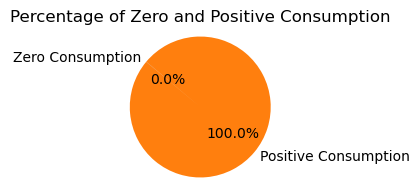

In [66]:
first_100000_rows = merged_res_file_pre_trial.iloc[:100000, :]

zero_consumption_count = (first_100000_rows['Consumption'] == 0).sum()
print(f"Number of zero consumption values: {zero_consumption_count}")

positive_consumption_count = (first_100000_rows['Consumption'] > 0).sum()
print(f"Number of positive consumption values: {positive_consumption_count}")

counts = [zero_consumption_count, positive_consumption_count]
labels = ['Zero Consumption', 'Positive Consumption']

plt.figure(figsize=(2, 2))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Zero and Positive Consumption')
plt.axis('equal')

plt.show()